### Data analysis of Section 15 data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

In [2]:
dateID = '250207'
niter = 8
iter_offset = 0 #iter1 was the initial measurements, and seemed incomplete
ntsamples = 100
nBMs = 27
band_width = 6 #in minutes; how long it took for each measurement
nrow = int(np.ceil(niter/3))

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_1/250207 GMT3 set1 15.2 16 gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_2/250207 GMT3 set2 15.2 16 gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_3/250207 GMT3 set3 15.2 16 gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_4/250207 GMT3 set4 15.2 16 gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_5/250207 GMT3 set5 15.2 16 gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-

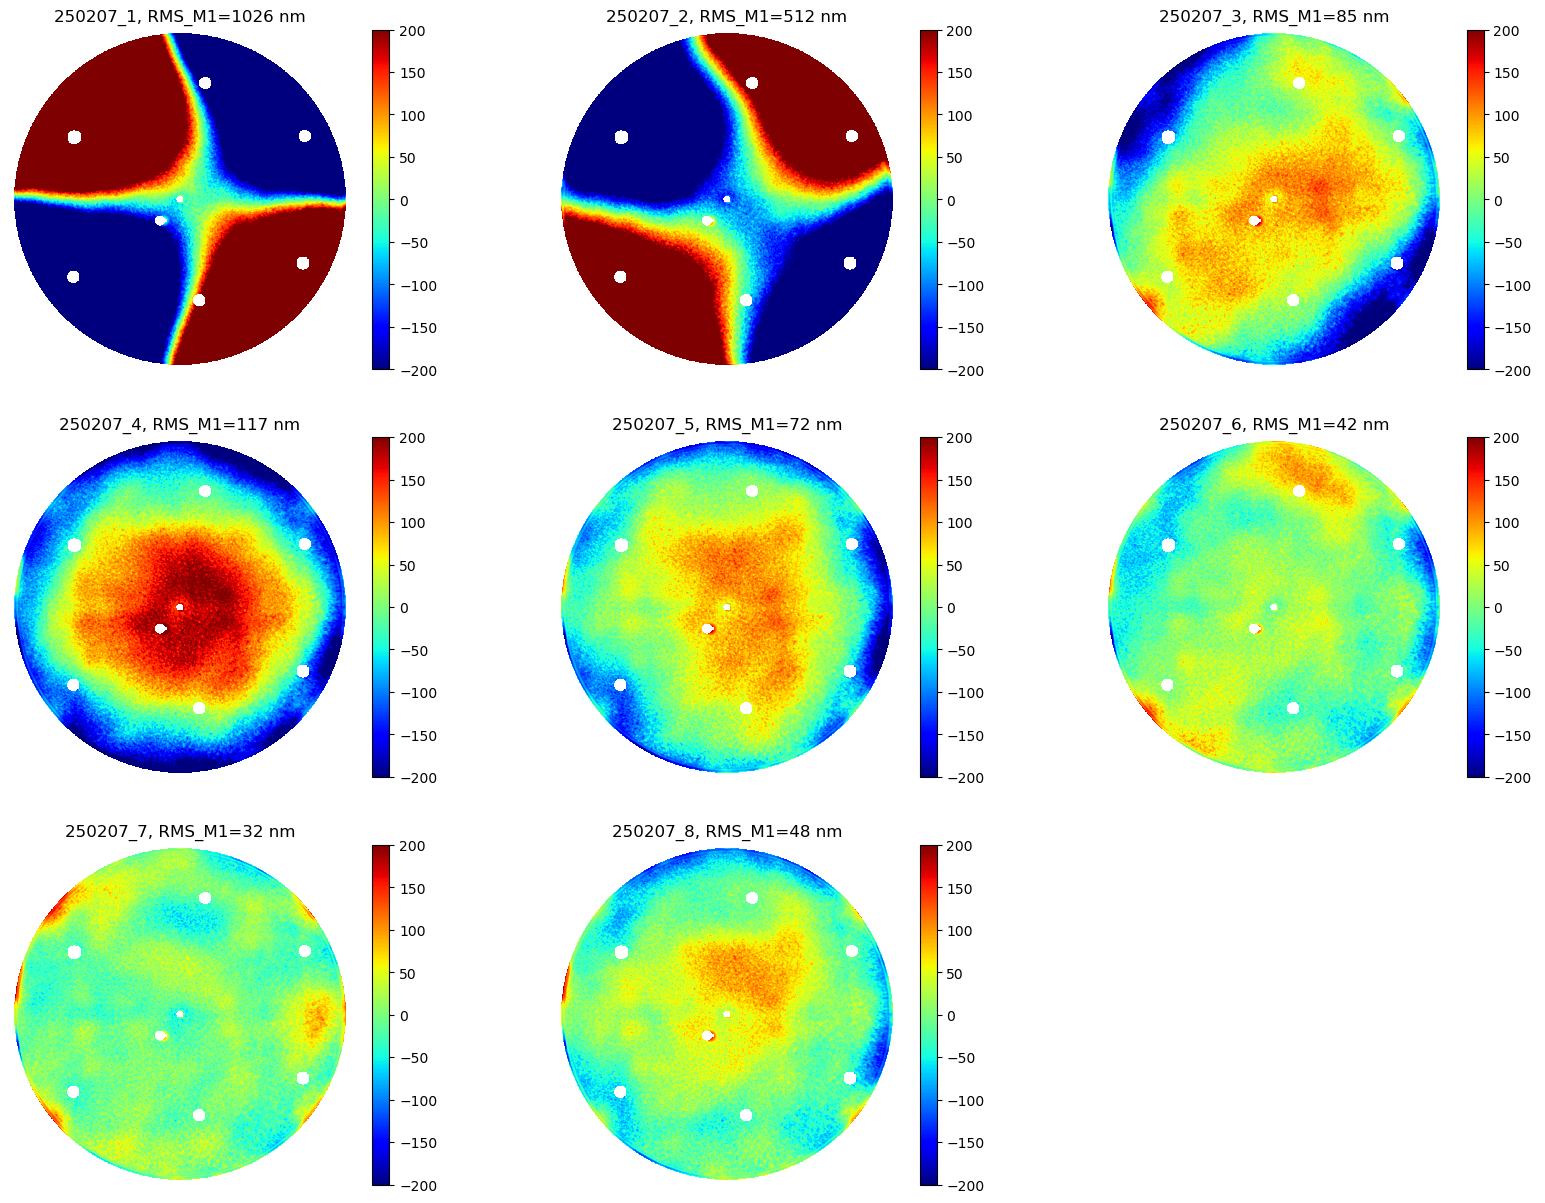

In [3]:
#plot processed maps from each iteration
m1s_array = np.zeros((Sxn, Syn, niter))
m1rms_array = np.zeros(niter)
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 15/-20 arcsec/%s_%s/%s*set*patched.h5'%(ml_data_dir,dateID, i+1+iter_offset, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    m1s_array[:,:, i] = m1s
    
    m1rms_array[i] = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1+iter_offset, m1rms_array[i]))
    ax[irow][icol].axis('off')
for i in range(nrow*3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    ax[irow][icol].axis('off')    

In [4]:
#we have to retrieve timestamps from earlier stage data files
#below is only for retrieving timestamps
ts_array = []
for i in range(niter):
    globstring = '%s/Sec 15/-20 arcsec/%s_%s/%s*set*comp -.h5'%(ml_data_dir,dateID, i+1+iter_offset, dateID)
    fileset = sorted(glob.glob(globstring))
    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    temp,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    ts_array.append(ts)

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_1/250207 GMT3 set1 15.2 16 gmtMorph170614 LFSsub comp -.h5: Fri Feb 07 11:59:56 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_2/250207 GMT3 set2 15.2 16 gmtMorph170614 LFSsub comp -.h5: Fri Feb 07 12:15:23 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_3/250207 GMT3 set3 15.2 16 gmtMorph170614 LFSsub comp -.h5: Fri Feb 07 12:28:27 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_4/250207 GMT3 set4 15.2 16 gmtMorph170614 LFSsub comp -.h5: Fri Feb 07 12:42:23 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_5/250207 GMT3 set5 15.2 16 gmtMorph170614 LFSsub comp -.h5: Fri Feb 07 12:55:11 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_6/250207 GMT3 set6 15.2 16 gmtMorph170614 LFSsub

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_1/250207 GMT3 set1 15.2 16 gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_2/250207 GMT3 set2 15.2 16 gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_3/250207 GMT3 set3 15.2 16 gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_4/250207 GMT3 set4 15.2 16 gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-20 arcsec/250207_5/250207 GMT3 set5 15.2 16 gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 fi

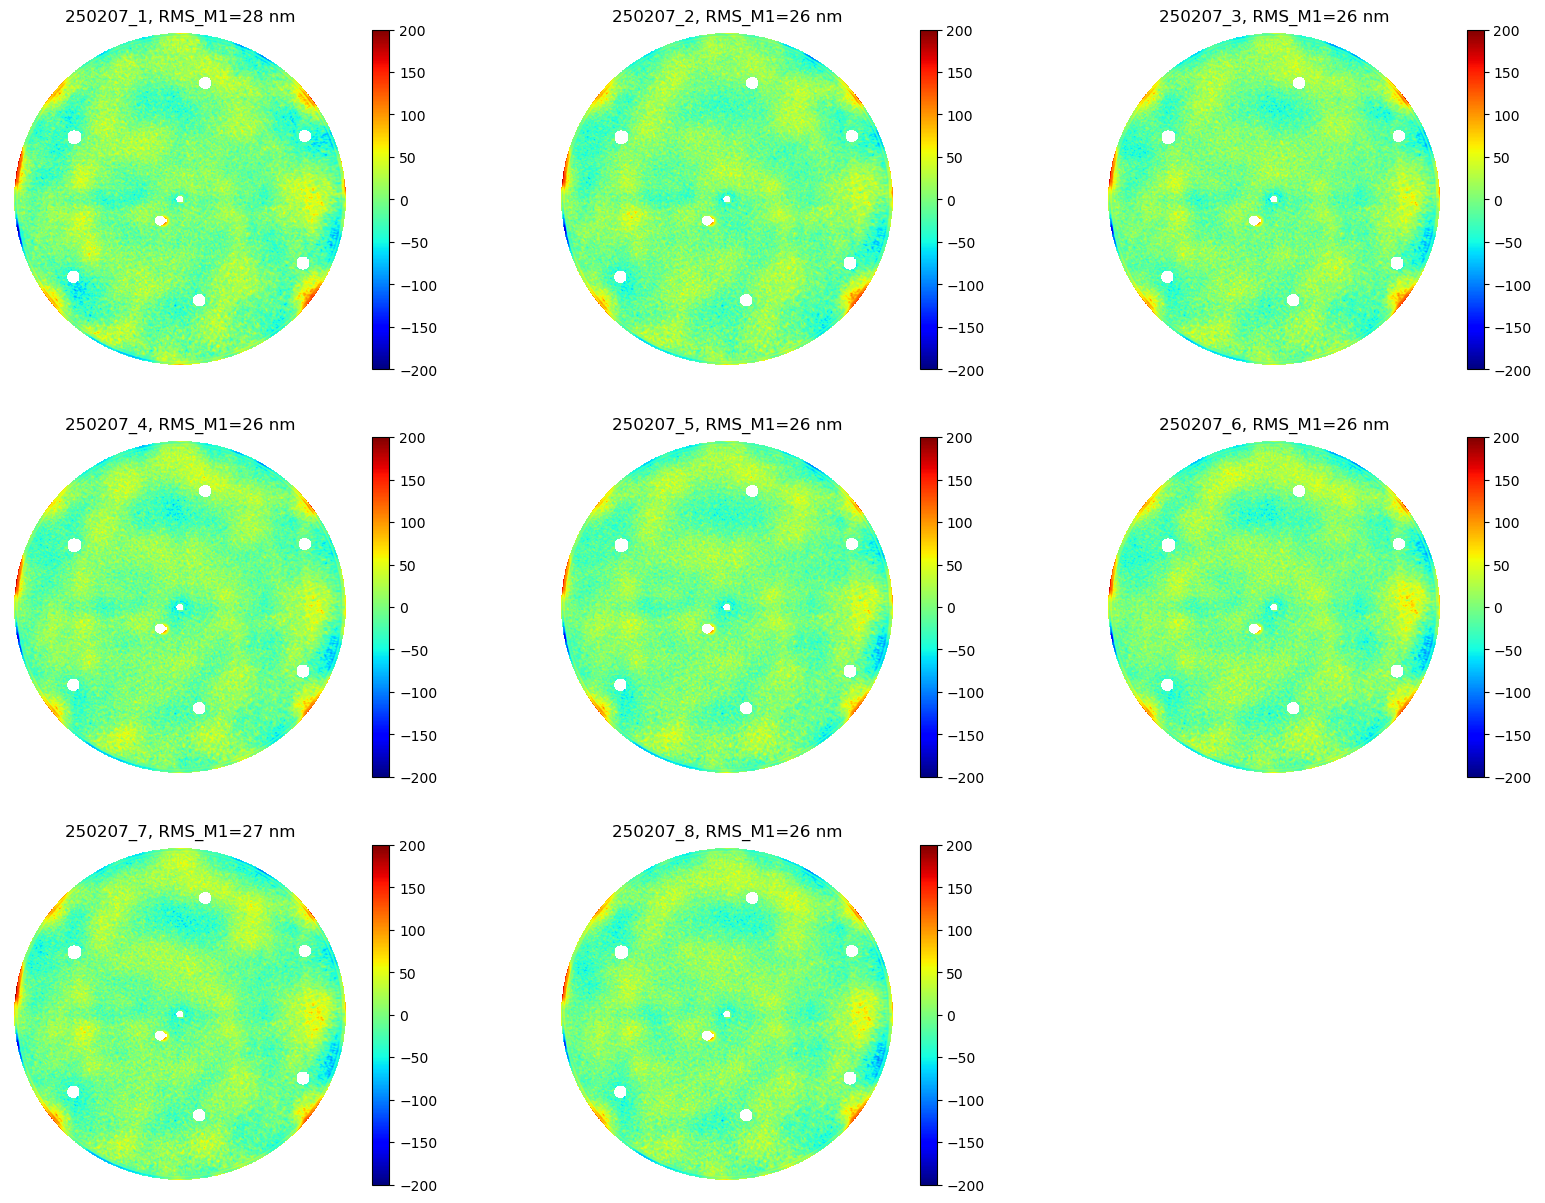

In [5]:
#predicted maps at each iteration
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 15/-20 arcsec/%s_%s/%s*set*patched - 27 GMT modes.h5'%(
        ml_data_dir,dateID, i+1+iter_offset, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    
    m1rms = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1+iter_offset, m1rms))
    ax[irow][icol].axis('off')
for i in range(nrow*3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    ax[irow][icol].axis('off')    

In [6]:
# fit surface map from each iteration to Zernike
#nzer = int(#(6*7)/2+1)
nzer = int((8*9)/2+1) 
zercoeff = np.zeros((niter, nzer))

[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for izer in range(nzer):
    zerU[:,izer] = zernike_polynomial(izer+1, x1/radius_of_CA, y1/radius_of_CA).flatten()
for i in range(niter):
    m1s = np.squeeze(m1s_array[:,:,i])
    maskNew = (~np.isnan(m1s) ) & (r1<radius_of_CA)
    nnodesNew = np.sum(maskNew)
    zercoeff[i,:] = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ m1s[maskNew]

In [7]:
## define continuous timestamps
start_time = unix_ts(ts_array[0])-60*6 - 60 #1 minute before starting the first measurement
end_time = unix_ts(ts_array[-1])+60*5 #5 minute after the last measurement
#get continuous mirror positions
mirror_pos_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', 
                                   duration_in_s=end_time-start_time, samples=ntsamples)
#get continuous bending forces
bend_force_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', 
                           duration_in_s=end_time-start_time, samples=ntsamples)
bend_force_z_ntsamples = bend_force_ntsamples[:,:,2]
# convert continuous forces to continuous BM coeffs.
bm_coeff_ntsamples = np.zeros((ntsamples, nBMs))
for i in range(ntsamples):
    bm_coeff_ntsamples[i,:] = VMat[:, :nBMs].transpose() @ gmt170Fvec2gmt165Fvec(bend_force_z_ntsamples[i,:]) \
        / np.sum(VMat[:,:nBMs]**2, axis=0)

m1_s1_support_ctrl/s/mirror_position/value
2025-02-07 11:52:56  duration =  6383  s
(100, 6)
m1_s1_support_ctrl/s/sa_bending_force/value
2025-02-07 11:52:56  duration =  6383  s
(100, 170, 3)


In [8]:
# get TC data
tc, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/tc_temperature/value', 
                   duration_in_s=end_time-start_time, samples=ntsamples)
tambient, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/ambient_temperature/value', 
                         duration_in_s=end_time-start_time, samples=ntsamples)
idxfo = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) > 4
idxfi = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) < 1
idxbo = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) > 4
idxbi = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) < 1

m1_s1_thermal_ctrl/i/tc_temperature/value
2025-02-07 11:52:56  duration =  6383  s
(100, 192)
m1_s1_thermal_ctrl/i/ambient_temperature/value
2025-02-07 11:52:56  duration =  6383  s
(100,)


In [9]:
def plotOptimization(iter_offset):
    '''
        all variables are global variables. Error occur if any has not been defined.

    '''
    niter = len(ts_array)
    assert niter == m1s_array.shape[2]
    assert niter == m1rms_array.shape[0]
    assert niter == zercoeff.shape[0]
    nzer = zercoeff.shape[1]
    assert ntsamples == bm_coeff_ntsamples.shape[0]
    nBMs = bm_coeff_ntsamples.shape[1]
    
    figsize = (10, 10)  # Adjust figure size
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(6, 1, height_ratios=[1, 1, 1, 1, 1, 1])  # Larger space for images at the top
    
    #row 1: plot the images at the top.
    for i in range(niter):
        left = i / niter  # Normalize the position
        width = 1 / niter  # Normalize the width
        ax_img = fig.add_axes([left, 0.8, width, 0.15])  # [x, y, width, height] in figure coordinates
        ax_img.imshow(m1s_array[:,:,i], origin='lower', vmin=-200, vmax=200)
        ax_img.set_title('iter %d, %.0f nm'%(i+1+iter_offset, m1rms_array[i]), fontsize=8, pad=3)
        ax_img.axis("off")  # Hide axes for clean layout
        
    # Compute elapsed time in minutes from t0
    t0 = tt[0]  # Start time (first timestamp)
    tt_minutes = (tt - t0) / 60  # Convert to minutes
    ts_minutes = ([unix_ts(t) for t in ts_array] - t0) / 60  # Convert ts_array to minutes

    # Add the 4 subplots (plots 1-4) that share the x-axis
    ax = [fig.add_subplot(gs[i]) for i in range(5)]  # Initialize axes for plots 1-4

    # row 2: plot Zernikes vs time
    for izer in range(nzer):
        condi = (izer+1>=4) and (izer+1<=8) #np.max(abs(zercoeff[:, izer]))>100
        labelString = 'Z%d'%(izer+1) if condi else None
        linestyle = '-' if condi else '--'
        ax[0].plot(ts_minutes-band_width/2., zercoeff[:, izer], linestyle ,label=labelString)
    ax[0].legend(ncol=5)
    ax[0].set_ylabel('Zernike RMS (nm)')
    
    #row 3: BM coefficients
    for modeID in np.arange(1, nBMs+1):
        labelString = ''
        if modeID in [1,2,3]: #np.max(np.abs(bm_coeff[1:,modeID-1]))>0.1:
            labelString = 'BM%2d'%modeID
        ax[1].plot(tt_minutes, bm_coeff_ntsamples[:, modeID-1], label=labelString)
    ax[1].legend()
    ax[1].set_ylabel('RMS in micron')
    
    #row 4: x,y,z
    for idof, slabel in enumerate(['x','y','z']):
        ax[2].plot(tt_minutes, mirror_pos_ntsamples[:,idof]*1e3, label=slabel) #now in mm
    ax[2].legend()
    ax[2].set_ylabel('mm')

    #row 5: Rxyz
    for idof, slabel in enumerate(['Rx','Ry','Rz']):
        ax[3].plot(tt_minutes, mirror_pos_ntsamples[:,idof+3]*rad2arcsec, label=slabel) #now in arcsec
    ax[3].legend()
    ax[3].set_ylabel('arcsecond')
    
    ax[4].plot(tt_minutes, tambient, 'grey', label='ambient')
    ax[4].plot(tt_minutes, np.mean(tc[:,idx_mirror_f][:,idxfo], axis=1), '--b', label='front edge')
    ax[4].plot(tt_minutes, np.mean(tc[:,idx_mirror_f][:,idxfi], axis=1), '-b', label='front center')
    ax[4].plot(tt_minutes, np.mean(tc[:,idx_mirror_b][:,idxbo], axis=1), '--r', label='back edge')
    ax[4].plot(tt_minutes, np.mean(tc[:,idx_mirror_b][:,idxbi], axis=1), '-r', label='back center')
    ax[4].legend(ncol=5) #, framealpha=0.7)
    ax[4].set_xlabel('Time (minutes)')
        
    # Adjust layout to remove gaps between plots 1-4 and ensure good spacing
    plt.subplots_adjust(hspace=0, top=0.75)  # Set hspace to 0 to remove gap between subplots
    for j in range(5):
        #ax[j].grid()
        ax[j].set_xlim(tt_minutes[0]-1, tt_minutes[-1])
        for i,t in enumerate(ts_minutes):
            ax[j].axvspan(t - band_width, t, color='gray', alpha=0.3)  # Ends at t, goes back 6 min
            if j==0:
                ax[j].text(t - band_width / 2, ax[0].get_ylim()[1], f"iter\n{i + 1+iter_offset}", 
                        color='black', fontsize=12, fontweight='bold',
                        ha='center', va='bottom')  # Label bands at the top center        

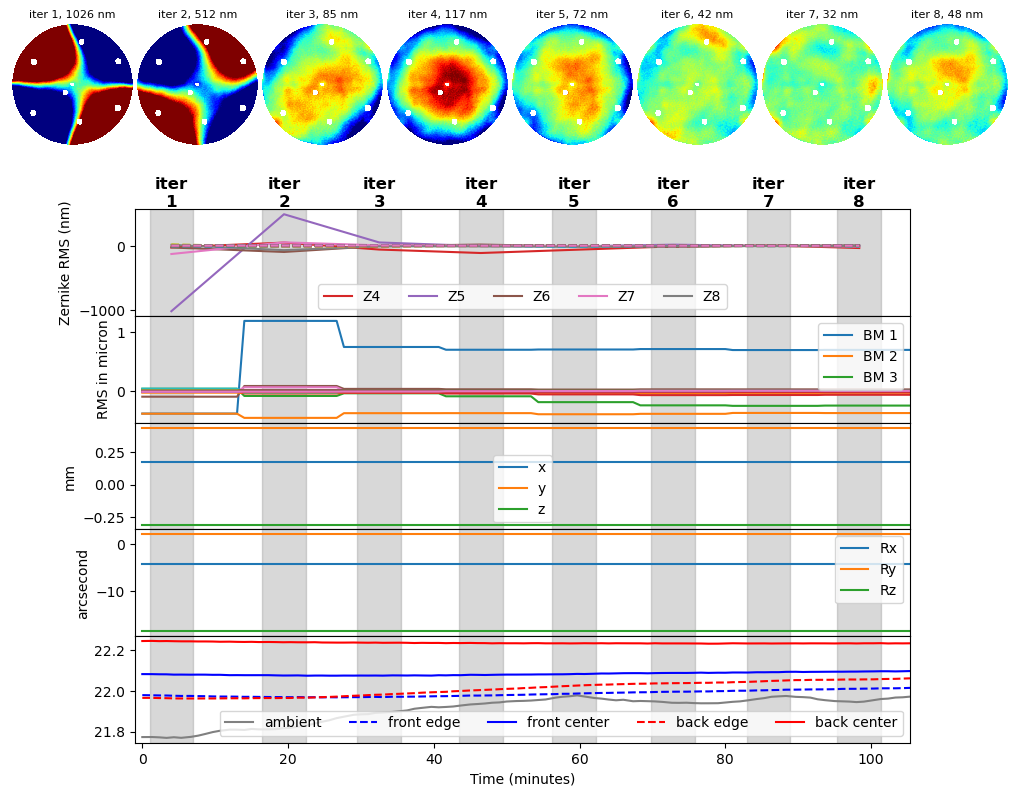

In [10]:
plotOptimization(iter_offset)